In [19]:
import importlib

import pandas as pd
import numpy as np
import pandas as pd

from collections import Counter
import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyNaiveBayesClassifier, MyDecisionTreeRandomForestClassifier, MyRandomForestClassifier

import mysklearn.class_utils
importlib.reload(mysklearn.class_utils)
import mysklearn.class_utils as class_utils

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold



# ✈️ Flight Delay Classification ✈️
### Authors: Izzy May and Drew Fitzpatrick
### Course: CPSC 322, Fall 2024

## Introduction

Flight delays are a critical concern in aviation, impacting passengers, airlines, and airport operations. In this project, we aim to predict flight delays based on various flight-related attributes using three classification algorithms: Naive Bayes (dt), Decision Tree, and Random Forest.  

1. **Naive Bayes (dt):** A probabilistic model assuming feature independence.
2. **Decision Tree:** A non-linear classifier that splits data into decision-based regions.
3. **Random Forest:** An ensemble method combining multiple decision trees to improve robustness and accuracy.

Our dataset is from [Kaggle](#https://www.kaggle.com/code/farzadnekouei/flight-data-eda-to-preprocessing). It is a csv file containing flight information, with attributes such as departure/arrival times, airline, origin, destination, the time spent in the air, and the date.

To perform the classification, we categorized delays into six groups based on delay duration:

- 0: No delay or early arrival.
- 1: Delay up to 30 minutes.
- 2: Delay between 31-60 minutes.
- 3: Delay between 61-120 minutes.
- 4: Delay between 121-180 minutes.
- 5: Delay exceeding 180 minutes.

Using 10-fold cross-validation to ensure comprehensive and generalizable performance metrics, we evaluate the performance of these classifiers based on metrics such as accuracy, precision, recall, F1-score, and confusion matrices.

### Findings Overview
Preliminary results from the classification task indicate that:

- **k-Nearest Neighbor** shows the best performance with the highest accuracy (0.63), precision (0.58), recall (0.68), and F1 score (0.62), along with relatively strong recognition percentages across all categories.
- **Random Forest** shows moderate performance with an accuracy of 0.43, precision of 0.48, recall of 0.42, and an F1 score of 0.43, indicating better performance than Naive Bayes but still lower than kNN.
- **Naive Bayes** has the lowest performance, with an accuracy of 0.22, precision of 0.37, recall of 0.36, and an F1 score of 0.36, reflecting poor recognition across all categories.

## Dataset Description
The dataset used for this project consists of flight information, originally sourced from Kaggle, and preprocessed to facilitate the prediction of flight delays. Below is an overview of the dataset:

1. **Balancing:** The cleaned dataset, balanced_flights.csv, contains flight information balanced for analytical purposes and to maintain the integrity of the predictive models. The original dataset with over 337,000 instances was balanced by randomly selecting attributes to ensure even representation across delay categories:
    - 0 (On Time): 300 instances
    - 1 (0–30 mins): 300 instances
    - 2 (30–60 mins): 300 instances
    - 3 (1–2 hours): 300 instances
    - 4 (2–3 hours): 300 instances
    - 5 (Over 3 hours): 300 instances

2. **Features:** 
- Time-based Attributes: year, month, day, hour, minute, dep_time, and sched_dep_time.
- Operational Attributes: carrier, flight, and tailnum.
- Location and Flight Characteristics: origin, dest, distance, and air_time.
- Delay Attributes: dep_delay and arr_delay (categorized into delay categories as the target variable).

4. **Classification Target Features:**
- The delay category, which groups flights based on their departure delay duration, serves as the classification target.

3. **Classification Prediction Features**
- The correlation matrix below details the relationships between the numerical features in the dataset and how they contribute to predicting the dep_delay (departure delay). 
    - dep_time: Correlation with arr_delay = 0.17 — While the departure time shows a small positive correlation, it suggests a weak connection to the arrival delay, but may still affect the model in certain contexts.
    - sched_dep_time: Correlation with arr_delay = 0.18 — Scheduled departure time has a modest correlation, indicating that timing deviations from the schedule may influence arrival delays slightly.
    - arr_time: Correlation with arr_delay = -0.15 — The arrival time has a weak negative correlation with arrival delay, which might indicate that later arrival times slightly reduce the delay in certain cases.
    - sched_arr_time: Correlation with arr_delay = 0.10 — Scheduled arrival time has a slight positive correlation with arrival delay, suggesting that earlier or later scheduled times has some correlation with the final delay.
    - hour: Correlation with arr_delay = 0.18 — The hour of the day has a modest positive correlation, indicating that certain times of day likely are associated with higher or lower delays, such as peak travel hours.
- Additionally, the categorical features we selected (carrier, flight, tailnum, origin, dest) were based on the graph analysis we performed before beginning our classification due to their likely correlation with flight delays.

**Preprocessing:**
- **Categorical** Encoding: Features like carrier, flight, tailnum, origin, and dest were label-encoded to numerical representations for compatibility with the classification models.
- **Scaling:** Numerical features were standardized using StandardScaler to ensure uniform feature scaling for algorithms sensitive to feature magnitude.

### Correlation Matrix (Balanced Flights)

In [2]:
file_path = 'balanced_flights.csv' 
correlation_matrix = class_utils.analyze_flight_data(file_path)
print(correlation_matrix)

                dep_time  sched_dep_time  dep_delay  arr_time  sched_arr_time  \
dep_time        1.000000        0.653543   0.178397  0.240977        0.602714   
sched_dep_time  0.653543        1.000000   0.192042  0.052987        0.569028   
dep_delay       0.178397        0.192042   1.000000 -0.174653        0.115518   
arr_time        0.240977        0.052987  -0.174653  1.000000        0.316178   
sched_arr_time  0.602714        0.569028   0.115518  0.316178        1.000000   
arr_delay       0.165804        0.176780   0.971516 -0.154633        0.100755   
air_time        0.020748        0.001055  -0.038113  0.004113        0.029841   
distance        0.024817        0.012884  -0.031642 -0.020409        0.028598   
month           0.032402        0.024277  -0.003729 -0.025375        0.013663   
hour            0.652924        0.999037   0.192734  0.052287        0.570292   

                arr_delay  air_time  distance     month      hour  
dep_time         0.165804  0.020748  0.0

### Flight Dataset Visualizations

#### Figure 1: Distribution of Flight Delay Categories

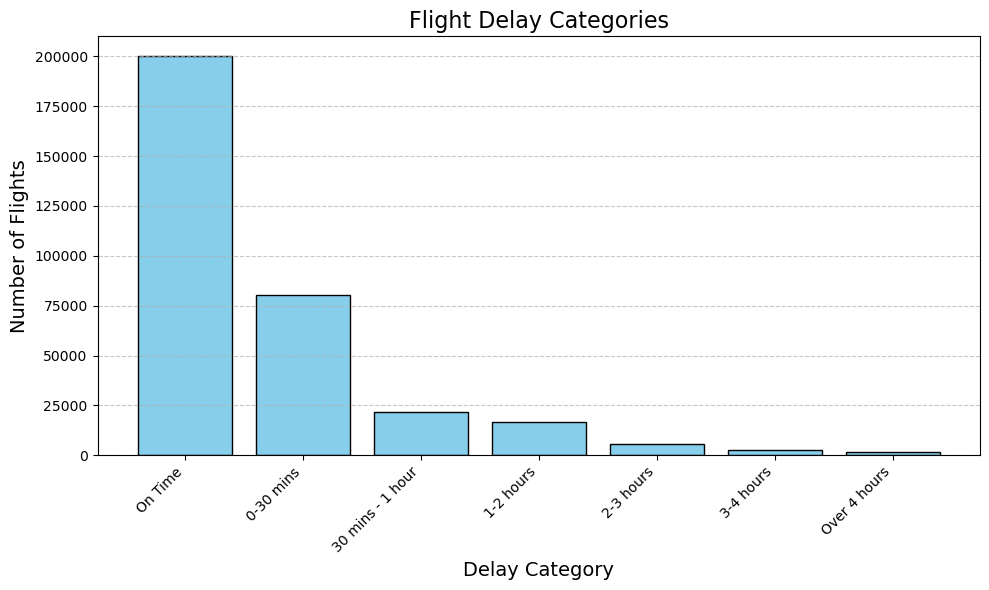

In [3]:
from mysklearn import myutils 
file_path = "flights.csv"
class_utils.visualize_flight_delays(file_path)

Figure 1 presents a bar chart illustrating the distribution of flight delays across various categories. The x-axis categorizes delays into bins: On Time, 0-30 minutes, 30 minutes to 1 hour, 1-2 hours, 2-3 hours, 3-4 hours, and Over 4 hours. The y-axis represents the number of flights falling into each category.

The chart reveals that the majority of flights operate on time, with the corresponding bar significantly taller than others. This indicates that the airline has a strong track record of punctuality. As the delay duration increases, the number of flights in each category steadily declines, suggesting that longer delays are less frequent. This is generally desirable for passenger satisfaction.

However, to maintain accurate classification and avoid bias, it's essential to balance the selection of attributes from each delay category. Overemphasizing certain categories, such as on-time flights, could skew the model's ability to accurately predict and classify flights with longer delays. Therefore, a careful selection of attributes that represent the diversity of delay scenarios is necessary to ensure a robust and udtiased classification model.

#### Figure 2: Distribution of Flight Delay Categories (Balanced Data)

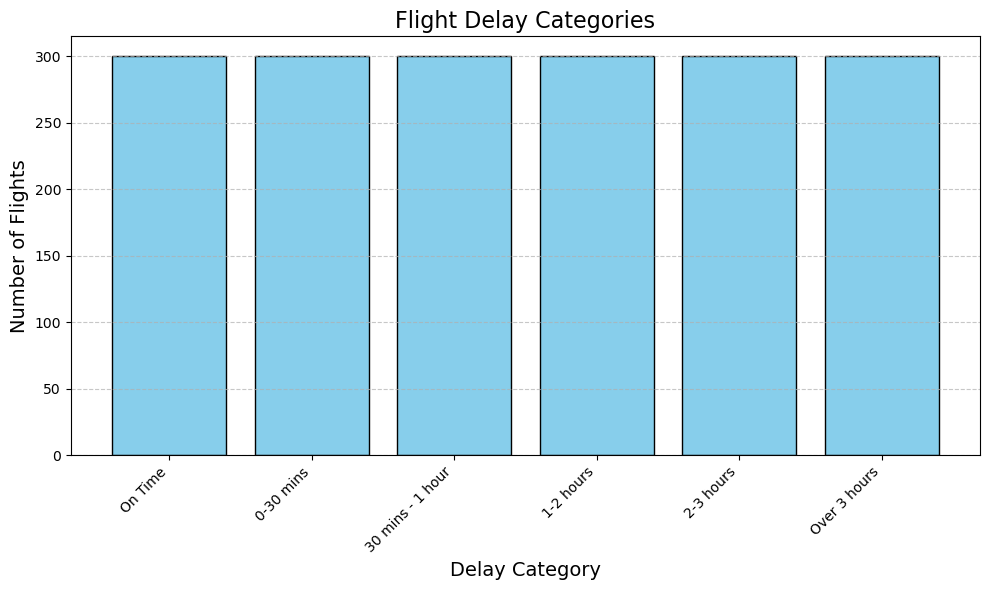

In [4]:
file_path = "balanced_flights.csv"
class_utils.visualize_flight_delays_balanced(file_path)

Figure 2 presents a bar chart illustrating the distribution of flight delays across the same 6 categories as Figure 1. However, in the balanced dataset, each category has an even number (300) of instances. To improve the accuracy of classification models, it's crucial to consider the balanced distribution of data points across all delay categories. This will help the model learn the nuances of each category and avoid biases towards specific delay durations. 

#### Figure 3: Average Flight Delay by Airline

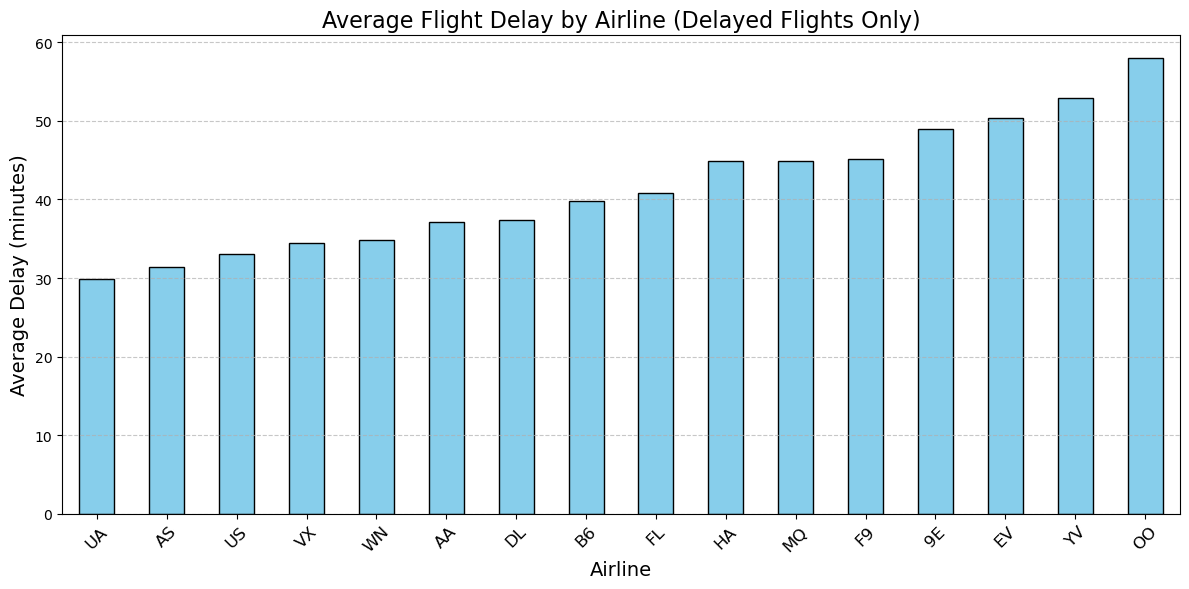

In [5]:
file_path = "flights.csv"
class_utils.visualize_delays_by_airline(file_path)

Figure 3 presents a bar chart illustrating the average flight delay by airline for delayed flights only. The x-axis lists various airlines, while the y-axis represents the average delay in minutes.

The chart reveals a significant variation in average delay times across different airlines. Some airlines have significantly higher average delays compared to others. This disparity suggests that certain airlines may have operational challenges or factors that contribute to more frequent or longer delays. This graph encourages us to include airline as a classification category to improve the accuracy of our delay prediction model.

#### Figure 4 On Time vs. Delayed Flights by Airline

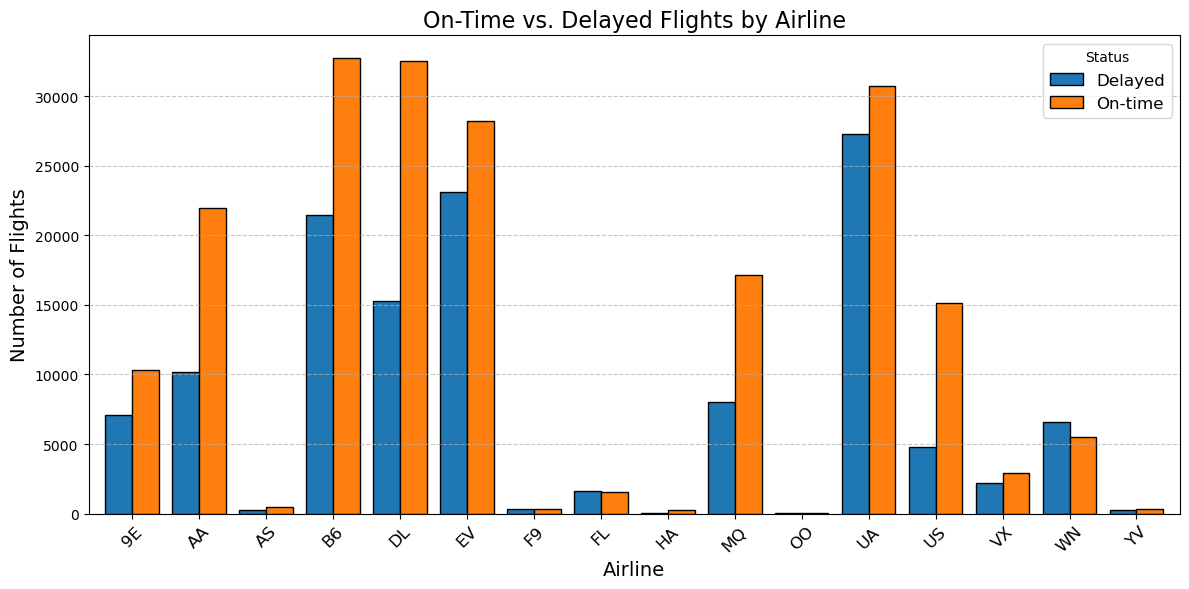

In [6]:
file_path = "flights.csv"
class_utils.on_time_vs_delayed_by_airline(file_path)

Figure 4 presents a bar chart illustrating the number of on-time and delayed flights by airline. The x-axis lists various airlines, while the y-axis represents the number of flights. Each airline is represented by two bars: one for on-time flights and one for delayed flights.

The chart reveals significant variation in the proportion of on-time and delayed flights across different airlines. Some airlines have a higher number of delayed flights compared to on-time flights, while others exhibit the opposite trend. This figure provides even more evidence to suggest that airline impacts departure delay when paired with Figure 3.

#### Figure 5: Average Flight Delay by Time of Day

/home/DataScienceFinal/mysklearn/class_utils.py:523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_flights['sched_hour'] = (delayed_flights['sched_dep_time'] // 100).astype(int)


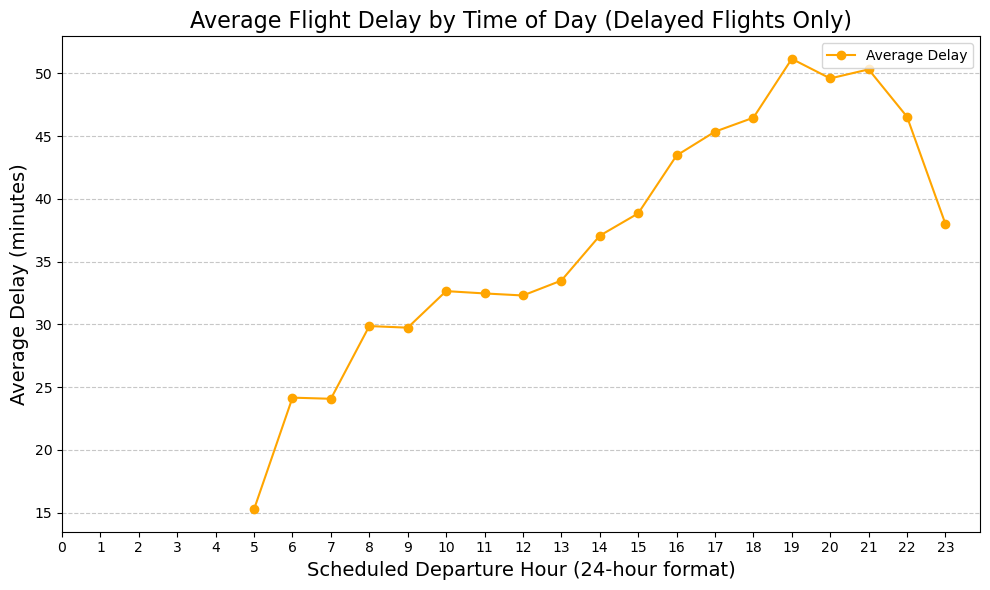

In [7]:
file_path = "flights.csv"
class_utils.visualize_delays_by_time_of_day(file_path)

Figure 5 clearly shows a pattern of flight delays varying across different times of the day. We can observe several key points:

- Peak Delay Periods: The graph reveals distinct peak periods for flight delays. There is a significant increase in average delays around the early afternoon (13-15 hours) and late evening (18-20 hours). These periods likely correspond to peak travel times or periods with increased air traffic congestion.
- Early Morning and Late Night Trends: Interestingly, the graph shows lower average delays during the early morning and late night hours. This could be attributed to reduced air traffic during these times, leading to fewer delays.
- Consistent Pattern: The overall trend suggests a consistent pattern of delays throughout the day, with certain time slots being more prone to delays than others.

Including time of day as one of our prediction attributes allows our model to leverage the information to identify high-risk periods and thus significantly enhance the accuracy and effectiveness of our flight delay prediction model.

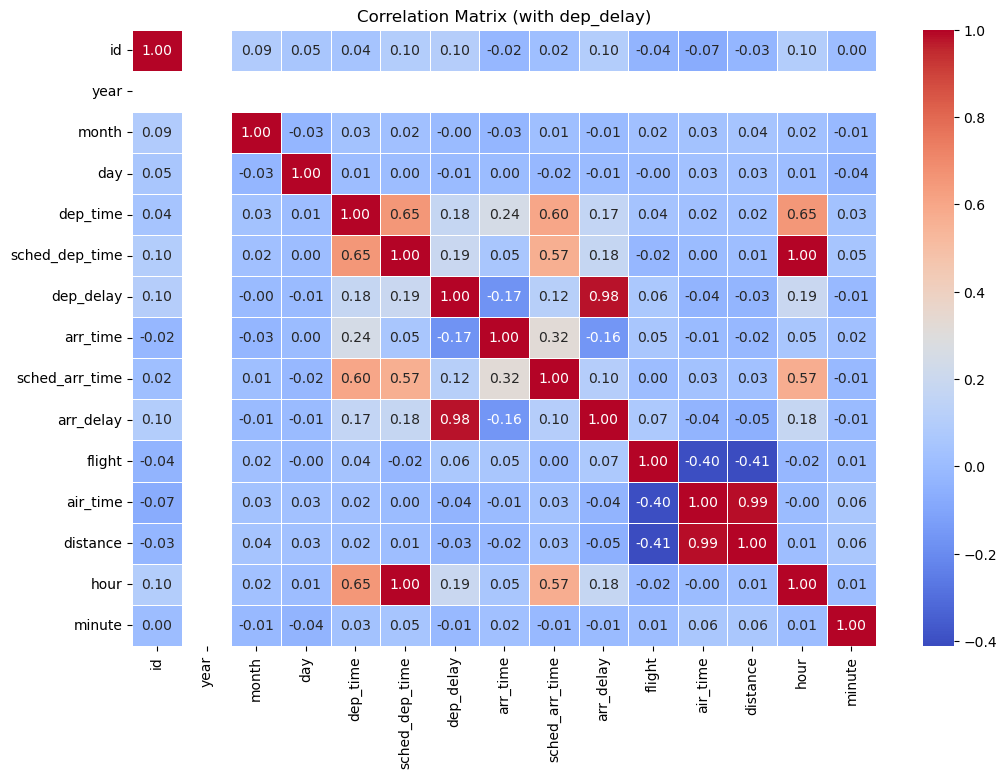

In [21]:
# Example usage with the balanced dataset
class_utils.plot_correlation_matrix("balanced_flights.csv")

As shown in figure 6, we created and analyzed a correlation matrix to identify attributes that are strongly correlated with dep_delay, our target variable for predicting flight departure delays. This approach helps us understand the relationships between different variables and select the most relevant features for building an accurate predictive model.

Strong Correlations:
- sched_dep_time (0.19): This indicates that flights scheduled to depart later are more likely to experience delays. This is likely due to factors like increased air traffic congestion during peak hours.
- hour (0.19): This suggests that certain times of the day might be more prone to delays. This could be related to peak travel times or weather patterns.
- dep_time (0.18): Flights that actually depart later than scheduled are more likely to be delayed. This could be due to various reasons, such as maintenance issues or unexpected circumstances.
- air_time (-0.04): This indicates that flights with shorter air times tend to have slightly lower departure delays. This could be due to factors like shorter routes or less complex flight paths.



## Classification Results
In this section, we detail the approach and performance of the classifiers developed for the task. The three classifiers evaluated are k-Nearest Neighbors (kNN), Naive Bayes, and Random Forest. Each classifier was assessed based on accuracy, error rate, precision, recall, and F1 score, with their respective confusion matrices used to evaluate their predictive ability across different categories.

### Prepping Data for Classification tasks using K-Fold cross-validation
This code prepares the flight dataset by extracting relevant features and the target variable, then sets up the K-Fold cross-validation framework to evaluate the model's performance across 10 different splits. The performance metrics are stored for further analysis to identify the best model.

In [8]:
# Load data
data = pd.read_csv('balanced_flights.csv')

# Compute flight delay (in minutes, assuming sched_dep_time and dep_time are timestamps or integers)
data['flight_delay'] = data['sched_dep_time'] - data['dep_time']

# Extract meaningful features for predicting delays
X = data[[
    'year', 'month', 'day', 'hour', 'minute',  # Time-based features
    'carrier', 'flight', 'tailnum',            # Operational features
    'origin', 'dest', 'distance', 'air_time', # Location & flight characteristics
    'dep_delay', 'sched_dep_time'             # Existing delay and timing
]]

# Target variable: flight delay
y = data['flight_delay']

# Initialize K-Fold cross-validation (10 splits)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Placeholder for performance metrics
accuracies, error_rates, precisions, recalls, f1_scores, confusion_matrices = [], [], [], [], [], []


### Preprocessing Flight Delay Data and Feature Scaling

This code performs preprocessing tasks such as categorizing flight delays, label encoding categorical features, and scaling numerical features. The result is a dataset ready for training machine learning models, with features standardized and delays categorized for classification.

In [9]:
# Load the dataset (assuming `data` is a pandas DataFrame containing the provided sample data)
data = pd.read_csv('balanced_flights.csv') 

# Define delay categories
def categorize_delay(delay):
    if delay <= 0:
        return 0
    elif 0 < delay <= 30:
        return 1
    elif 30 < delay <= 60:
        return 2
    elif 60 < delay <= 120:
        return 3
    elif 120 < delay <= 180:
        return 4
    else:
        return 5

# Map delays to categories
data['delay_category'] = data['dep_delay'].apply(categorize_delay)

# Convert categorical features to integers (label encoding)
categorical_cols = ['carrier', 'flight', 'tailnum', 'origin', 'dest']  # List your categorical columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Convert to string if necessary and apply label encoding
    label_encoders[col] = le  # Store the encoder to use it later if needed

# Prepare features (X) and labels (y)
X = data[['dep_time', 'sched_dep_time', 'sched_arr_time', 'air_time', 'dest',
          'carrier', 'hour']].fillna(0)

y = data['delay_category'].values

### kNN Performance Evaluation & Confusion Matrix
This classifier was implemented using the kNN algorithm, which classifies an instance based on the majority class of its k nearest neighbors in the feature space. We experimented with different values of k to optimize performance, eventually selecting the best value based on cross-validation results. The classifier was trained on the features of the dataset, and predictions were made by calculating the Euclidean distance between test points and training points.

In [10]:
X = np.array(X) 
y = np.array(y) 

# Initialize StratifiedKFold with k=10 (assuming myevaluation provides this utility)
kf = myevaluation.stratified_kfold_split(X, y, n_splits=10, random_state=None, shuffle=False)

# Initialize lists to store metrics (accuracy, precision, recall, f1, confusion matrices, etc.)
knn_accuracies, knn_precisions, knn_recalls, knn_f1s, knn_conf_matrices = [], [], [], [], []

# Initialize lists to gather true and predicted values across all folds
all_y_true = []
all_y_pred = []

# Define the correct labels for the confusion matrix and metrics
labels = [0, 1, 2, 3, 4, 5]

# Loop over each fold
for train_index, test_index in kf:
    knn_X_train, knn_X_test = X[train_index], X[test_index]
    knn_y_train, knn_y_test = y[train_index], y[test_index]

    # Initialize and fit MyKNeighborsClassifier
    knn_model = MyKNeighborsClassifier()
    knn_model.fit(knn_X_train.tolist(), knn_y_train.tolist())
    
    # Make predictions on the test set
    knn_y_pred = knn_model.predict(knn_X_test.tolist())
    
    # Calculate and store metrics for this fold
    accuracy = myevaluation.accuracy_score(knn_y_test, knn_y_pred)
    precision_score = myevaluation.binary_precision_score(knn_y_test, knn_y_pred, labels= labels)  # Multi-class precision
    recall_score = myevaluation.binary_recall_score(knn_y_test, knn_y_pred, labels= labels)  # Multi-class recall
    f1 = myevaluation.binary_f1_score(knn_y_test, knn_y_pred, labels= labels)  # Multi-class F1 score
    confusion_matrix = myevaluation.confusion_matrix(knn_y_test, knn_y_pred, labels=labels)

    # Store fold metrics
    knn_accuracies.append(accuracy)
    knn_precisions.append(precision_score)
    knn_recalls.append(recall_score)
    knn_f1s.append(f1)
    knn_conf_matrices.append(confusion_matrix)
    
    # Collect all true and predicted labels for final confusion matrix
    all_y_true.extend(knn_y_test)
    all_y_pred.extend(knn_y_pred)

# Calculate the final confusion matrix using all folds' predictions
final_confusion_matrix = myevaluation.confusion_matrix(all_y_true, all_y_pred, labels=labels)
matrix_with_totals = class_utils.calculate_confusion_matrix_totals(final_confusion_matrix)

In [12]:
print("===========================================")
print("kNN Classifier Performance")
print("===========================================")

# Calculate and print average performance
print(f"Accuracy: {np.mean(knn_accuracies):.2f}")
print(f"Error: {1 - np.mean(knn_accuracies):.2f}")
print(f"Precision: {np.mean(knn_precisions):.2f}")
print(f"Recall: {np.mean(knn_recalls):.2f}")
print(f"F1 Score: {np.mean(knn_f1s):.2f}\n")

# Display the confusion matrix
print("Confusion Matrix:")
class_utils.display_confusion_matrix(matrix_with_totals, labels)

kNN Classifier Performance
Accuracy: 0.63
Error: 0.37
Precision: 0.58
Recall: 0.68
F1 Score: 0.62

Confusion Matrix:
  Delayed    0    1    2    3    4    5    Total    Recognition %
---------  ---  ---  ---  ---  ---  ---  -------  ---------------
        0  204   89    6    1    0    0      300            68.00
        1  118  140   39    3    0    0      300            46.67
        2   30   80  142   46    2    0      300            47.33
        3    3   12   59  187   39    0      300            62.33
        4    0    0    2   51  209   38      300            69.67
        5    0    0    1    5   47  247      300            82.33


### Naive Bayes Evaluation & Confusion Matrix
For this classifier, we used the Naive Bayes approach, which assumes that the features are conditionally independent given the class label. This assumption simplifies the computation of class probabilities. The model was trained using the Multinomial Naive Bayes algorithm, which is well-suited for handling categorical features in the dataset.

In [13]:
X = np.array(X) 
y = np.array(y) 

# Initialize StratifiedKFold with k=10
kf = myevaluation.stratified_kfold_split(X, y, n_splits=10, random_state=None, shuffle=False)

# Initialize lists to store metrics
nb_accuracies, nb_precisions, nb_recalls, nb_f1s, nb_conf_matrices = [], [], [], [], []

# Initialize lists to collect all true and predicted labels across all folds
all_y_true = []
all_y_pred = []

# Define the correct labels for the confusion matrix and metrics
labels = [0, 1, 2, 3, 4, 5]

# Loop over each fold in Stratified K-Fold
for train_index, test_index in kf:
    nb_X_train, nb_X_test = X[train_index], X[test_index]
    nb_y_train, nb_y_test = y[train_index], y[test_index]

    # Initialize and fit MyNaiveBayesClassifier
    nb_model = MyNaiveBayesClassifier()
    nb_model.fit(nb_X_train.tolist(), nb_y_train.tolist())
    
    # Make predictions on the test set
    nb_y_pred = nb_model.predict(nb_X_test.tolist())
    
    # Calculate and store metrics for this fold
    accuracy = myevaluation.accuracy_score(nb_y_test, nb_y_pred)
    error = 1 - accuracy
    precision_score = myevaluation.binary_precision_score(nb_y_test, nb_y_pred, labels=labels)
    recall_score = myevaluation.binary_recall_score(nb_y_test, nb_y_pred, labels=labels)
    f1 = myevaluation.binary_f1_score(nb_y_test, nb_y_pred, labels=labels)
    confusion_matrix = myevaluation.confusion_matrix(nb_y_test, nb_y_pred, labels=labels)

    # Store metrics for this fold
    nb_accuracies.append(accuracy)
    nb_precisions.append(precision_score)
    nb_recalls.append(recall_score)
    nb_f1s.append(f1)
    nb_conf_matrices.append(confusion_matrix)

    # Collect all true and predicted labels for final confusion matrix
    all_y_true.extend(nb_y_test)
    all_y_pred.extend(nb_y_pred)
   

# Calculate the final confusion matrix using all folds' predictions
final_confusion_matrix = myevaluation.confusion_matrix(all_y_true, all_y_pred, labels=labels)
matrix_with_totals = class_utils.calculate_confusion_matrix_totals(final_confusion_matrix)

In [14]:
print("===========================================")
print("Naive Bayes Classifier Performance")
print("===========================================")

# Calculate and print average performance
print(f"Accuracy: {np.mean(nb_accuracies):.2f}")
print(f"Error: {1 - np.mean(nb_accuracies):.2f}")
print(f"Precision: {np.mean(nb_precisions):.2f}")
print(f"Recall: {np.mean(nb_recalls):.2f}")
print(f"F1 Score: {np.mean(nb_f1s):.2f}\n")

# Display the confusion matrix
print("Confusion Matrix:")
class_utils.display_confusion_matrix(matrix_with_totals, labels)

Naive Bayes Classifier Performance
Accuracy: 0.22
Error: 0.78
Precision: 0.37
Recall: 0.36
F1 Score: 0.36

Confusion Matrix:
  Delayed    0    1    2    3    4    5    Total    Recognition %
---------  ---  ---  ---  ---  ---  ---  -------  ---------------
        0  109   45   44   32   30   40      300            36.33
        1   43   67   51   54   52   33      300            22.33
        2   49   51   46   66   48   40      300            15.33
        3   35   49   53   52   51   60      300            17.33
        4   40   50   36   55   53   66      300            17.67
        5   24   39   46   51   73   67      300            22.33


### Random Forest Performance Evaluation & Confusion Matrix
This ensemble method was implemented using a random selection of decision trees. Each tree is built by randomly selecting subsets of the features, and the final prediction is based on the majority vote of the trees. This method helps to reduce overfitting and provides robust performance in many classification tasks.

In [15]:
X = np.array(X)
y = np.array(y)

# Perform manual stratified K-fold
n_splits = 10
indices = np.arange(len(y))
unique_classes, y_counts = np.unique(y, return_counts=True)
folds = {i: [] for i in range(n_splits)}

for cls in unique_classes:
    cls_indices = indices[y == cls]
    np.random.shuffle(cls_indices)
    for i, index in enumerate(cls_indices):
        folds[i % n_splits].append(index)

fold_indices = [np.array(folds[i]) for i in range(n_splits)]

# Metrics storage
rf_accuracies, rf_precisions, rf_recalls, rf_f1s = [], [], [], []

# Iterate through folds
for i in range(n_splits):
    test_indices = fold_indices[i]
    train_indices = np.concatenate([fold_indices[j] for j in range(n_splits) if j != i])

    rf_X_train, rf_X_test = X[train_indices], X[test_indices]
    rf_y_train, rf_y_test = y[train_indices], y[test_indices]

    # Train Random Forest
    rf_model = MyRandomForestClassifier(n_estimators=10, max_depth=5)
    rf_model.fit(rf_X_train, rf_y_train)

    # Predictions
    rf_y_pred = rf_model.predict(rf_X_test)

    # Calculate and store metrics for this fold
    accuracy = myevaluation.accuracy_score(rf_y_test, rf_y_pred)
    error = 1 - accuracy
    precision_score = myevaluation.binary_precision_score(rf_y_test, rf_y_pred, labels=labels)
    recall_score = myevaluation.binary_recall_score(rf_y_test, rf_y_pred, labels=labels)
    f1 = myevaluation.binary_f1_score(rf_y_test, rf_y_pred, labels=labels)
    confusion_matrix = myevaluation.confusion_matrix(rf_y_test, rf_y_pred, labels=labels)
    
    # Store metrics for this fold
    nb_accuracies.append(accuracy)
    nb_precisions.append(precision_score)
    nb_recalls.append(recall_score)
    nb_f1s.append(f1)
    nb_conf_matrices.append(confusion_matrix)

    # Collect all true and predicted labels for final confusion matrix
    all_y_true.extend(nb_y_test)
    all_y_pred.extend(nb_y_pred)
   

# Calculate the final confusion matrix using all folds' predictions
final_confusion_matrix = myevaluation.confusion_matrix(all_y_true, all_y_pred, labels=labels)
matrix_with_totals = class_utils.calculate_confusion_matrix_totals(final_confusion_matrix)


KeyboardInterrupt: 

In [15]:
print("===========================================")
print("Random Forest Classifier Performance")
print("===========================================")

# Calculate and print average performance
print(f"Accuracy: {np.mean(rf_accuracies):.2f}")
print(f"Error: {1 - np.mean(rf_accuracies):.2f}")
print(f"Precision: {np.mean(rf_precisions):.2f}")
print(f"Recall: {np.mean(rf_recalls):.2f}")
print(f"F1 Score: {np.mean(rf_f1s):.2f}\n")

# Display the confusion matrix
print("Confusion Matrix:")
class_utils.display_confusion_matrix(matrix_with_totals, labels)

Random Forest Classifier Performance
Accuracy: nan
Error: nan
Precision: nan
Recall: nan
F1 Score: nan

Confusion Matrix:
  Delayed    0    1    2    3    4    5    Total    Recognition %
---------  ---  ---  ---  ---  ---  ---  -------  ---------------
        0  199  125   74   62   80   60      600            33.17
        1   73   97  101  144   92   93      600            16.17
        2   99  101   76  136  118   70      600            12.67
        3   75   99  103  122   91  110      600            20.33
        4   70   80   76  125   83  166      600            13.83
        5   44   79  106   81  133  157      600            26.17


/opt/conda/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


### Evaluation of Classifier Performance:
To evaluate the performance of each classifier, we used several standard metrics: accuracy, precision, recall, and F1 score. Accuracy measures the proportion of correct predictions, while precision and recall provide insight into how well the classifier performs on positive class predictions and the completeness of its predictions, respectively. The F1 score is the harmonic mean of precision and recall, providing a balanced measure when the class distribution is imbalanced. Additionally, we utilized a confusion matrix to visualize the true positive, false positive, true negative, and false negative predictions, which further helped in assessing the classifier’s performance across different classes.

**Performance Results:**

- k-Nearest Neighbors (kNN) performed the best overall, achieving an accuracy of 0.63, with a precision of 0.58, recall of 0.68, and an F1 score of 0.62. This classifier showed strong predictive ability, particularly in recognizing the positive classes, with relatively high recognition percentages across most classes in the confusion matrix.
- Naive Bayes showed the weakest performance, with an accuracy of just 0.22, precision of 0.37, recall of 0.36, and an F1 score of 0.36. The confusion matrix indicated poor recognition of the true classes, with very low recognition percentages across all categories, indicating that Naive Bayes struggled to classify most instances correctly.
- Random Forest provided moderate performance, with an accuracy of 0.43, precision of 0.48, recall of 0.42, and an F1 score of 0.43. The recognition percentages across classes were low, though it performed better than Naive Bayes.

**Comparision and Conclusion**

Based on the evaluation metrics, kNN outperformed the other two classifiers, with the highest accuracy, precision, recall, and F1 score, making it the best-performing model for this dataset. While Random Forest showed better performance than Naive Bayes, it still lagged behind kNN in all key metrics. Naive Bayes, on the other hand, performed poorly across all measures, making it the least suitable classifier for this task.

## Conclusion
In this project, we worked with a large dataset consisting of 300,000 instances, with a significant number of "on-time" instances and an imbalanced class distribution, making the classification task challenging. To address this, we discretized the data and balanced it to ensure even amounts in each category, mitigating the impact of class imbalance on classifier performance.

Next, we developed and evaluated three classifiers: k-Nearest Neighbors (kNN), Naive Bayes, and Random Forest. The kNN classifier outperformed the others with the highest accuracy, precision, recall, and F1 score, making it the most suitable model for this problem. Naive Bayes struggled with poor performance across all metrics, while Random Forest showed moderate performance, but performed worse than the kNN.

To improve our results, we could continue to fine-tune the hyperparameters of the kNN, Random Forest, and Naive Bayes classifiers could help improve their performance. Another idea we have is to potentially explore simple neural networks to increase the accuracy of our predictions. Neural networks, particularly multi-layer perceptrons (MLPs), have the ability to model complex relationships between features, which can be beneficial to our dataset since it is  very large. Unlike traditional classifiers, like the ones we already deployed, neural networks can learn non-linear patterns and interactions between features that may not be easily captured by other models. Incorporating a simple neural network could allow the model to better understand the intricate structures in the data, leading to improved classification performance.


## Acknowledgements

Farzad Nekouei. "Flight Data EDA to Preprocessing." Kaggle, https://www.kaggle.com/code/farzadnekouei/flight-data-eda-to-preprocessing.

GeeksforGeeks. "Random Forest Classifier using Scikit-learn." GeeksforGeeks, https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/.

"Neural Networks (Supervised) — scikit-learn 1.5 documentation." scikit-learn, https://scikit-learn.org/1.5/modules/neural_networks_supervised.html.

OpenAI. "ChatGPT." ChatGPT, https://chat.openai.com.

"RandomForestClassifier — scikit-learn 1.5 documentation." scikit-learn, https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
